In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"E:\Data\Data Cleaning Practice\club_member_info.csv")

In [7]:
df.head()

,full_name,age,martial_status,email,phone,full_address,job_title,membership_date
0,addie lush,40.0,married,alush0@shutterfly.com,254-389-8708,"3226 Eastlawn Pass,Temple,Texas",Assistant Professor,7/31/2013
1,ROCK CRADICK,46.0,married,rcradick1@newsvine.com,910-566-2007,"4 Harbort Avenue,Fayetteville,North Carolina",Programmer III,5/27/2018
2,???Sydel Sharvell,46.0,divorced,ssharvell2@amazon.co.jp,702-187-8715,"4 School Place,Las Vegas,Nevada",Budget/Accounting Analyst I,10/6/2017
3,Constantin de la cruz,35.0,NaN,co3@bloglines.com,402-688-7162,"6 Monument Crossing,Omaha,Nebraska",Desktop Support Technician,10/20/2015
4,Gaylor Redhole,38.0,married,gredhole4@japanpost.jp,917-394-6001,"88 Cherokee Pass,New York City,New York",Legal Assistant,5/29/2019


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   full_name        2010 non-null   object 
 1   age              2007 non-null   float64
 2   martial_status   1990 non-null   object 
 3   email            2010 non-null   object 
 4   phone            2001 non-null   object 
 5   full_address     2010 non-null   object 
 6   job_title        1971 non-null   object 
 7   membership_date  2010 non-null   object 
dtypes: float64(1), object(7)
memory usage: 125.8+ KB


In [9]:
df.describe()

,age
count,2007.000000
mean,44.926756
std,41.498191
min,18.000000
25%,32.000000
50%,41.000000
75%,51.000000
max,677.000000


### Remove outliers in `age`

<Axes: >

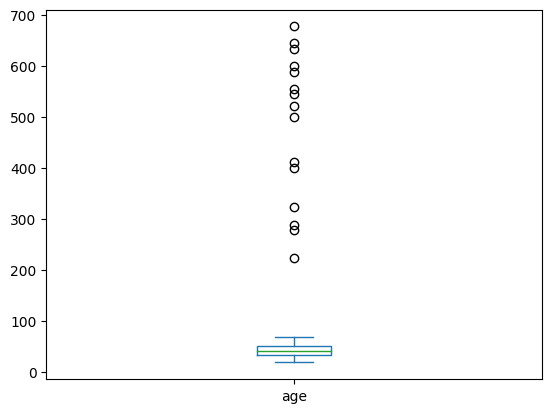

In [11]:
df.age.plot(kind='box')

In [12]:
df.drop(df.loc[df.age > 100].index,inplace=True)

<Axes: >

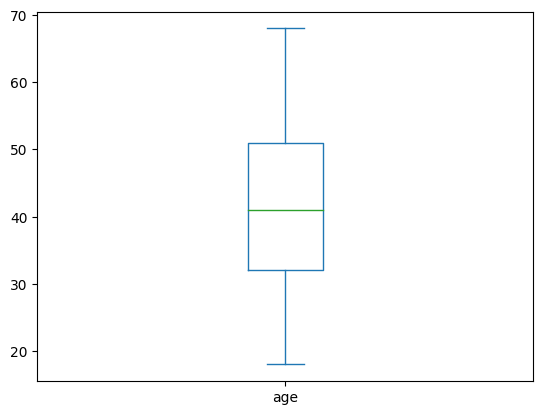

In [13]:
df.age.plot(kind='box')

In [14]:
df.isna().sum()

full_name           0
age                 3
martial_status     20
email               0
phone               8
full_address        0
job_title          39
membership_date     0
dtype: int64

### Remove Duplicates 


In [23]:
df.duplicated(subset='email',keep=False).value_counts()

False    1978
True       17
Name: count, dtype: int64

In [26]:
df.drop_duplicates(subset='email',keep='first',inplace=True)

### Split `full_name` column into first name and last name, capitalize the first words and remove special characters.

In [76]:
df[['first_name','last_name']] = df.full_name.str.strip().str.split(' ',n=1,expand=True)

In [84]:
df.head()

,full_name,age,martial_status,email,phone,full_address,job_title,membership_date,first_name,last_name
0,addie lush,40.0,married,alush0@shutterfly.com,254-389-8708,"3226 Eastlawn Pass,Temple,Texas",Assistant Professor,7/31/2013,addie,lush
1,ROCK CRADICK,46.0,married,rcradick1@newsvine.com,910-566-2007,"4 Harbort Avenue,Fayetteville,North Carolina",Programmer III,5/27/2018,ROCK,CRADICK
2,???Sydel Sharvell,46.0,divorced,ssharvell2@amazon.co.jp,702-187-8715,"4 School Place,Las Vegas,Nevada",Budget/Accounting Analyst I,10/6/2017,???Sydel,Sharvell
3,Constantin de la cruz,35.0,NaN,co3@bloglines.com,402-688-7162,"6 Monument Crossing,Omaha,Nebraska",Desktop Support Technician,10/20/2015,Constantin,de la cruz
4,Gaylor Redhole,38.0,married,gredhole4@japanpost.jp,917-394-6001,"88 Cherokee Pass,New York City,New York",Legal Assistant,5/29/2019,Gaylor,Redhole


In [89]:
df.first_name = df.first_name.str.replace('?','')

In [93]:
df.first_name=df.first_name.str.title()

In [109]:
df.head()

,full_name,age,martial_status,email,phone,full_address,job_title,membership_date,first_name,last_name,a
0,addie lush,40.0,married,alush0@shutterfly.com,254-389-8708,"3226 Eastlawn Pass,Temple,Texas",Assistant Professor,7/31/2013,Addie,Lush,False
1,ROCK CRADICK,46.0,married,rcradick1@newsvine.com,910-566-2007,"4 Harbort Avenue,Fayetteville,North Carolina",Programmer III,5/27/2018,Rock,Cradick,False
2,???Sydel Sharvell,46.0,divorced,ssharvell2@amazon.co.jp,702-187-8715,"4 School Place,Las Vegas,Nevada",Budget/Accounting Analyst I,10/6/2017,Sydel,Sharvell,False
3,Constantin de la cruz,35.0,NaN,co3@bloglines.com,402-688-7162,"6 Monument Crossing,Omaha,Nebraska",Desktop Support Technician,10/20/2015,Constantin,De La Cruz,False
4,Gaylor Redhole,38.0,married,gredhole4@japanpost.jp,917-394-6001,"88 Cherokee Pass,New York City,New York",Legal Assistant,5/29/2019,Gaylor,Redhole,False


In [95]:
df.last_name = df.last_name.str.title()

### clean `martial_status`

In [100]:
df.martial_status.value_counts()

martial_status
married      868
single       649
divorced     282
separated    167
Name: count, dtype: int64

In [99]:
df.loc[df.martial_status == 'divored','martial_status'] = 'divorced'

### Clean `phone` column

In [123]:
df.phone.str.len().value_counts()

phone
12.0    1973
8.0        2
11.0       2
10.0       1
Name: count, dtype: int64

In [126]:
df.drop(df.loc[df.phone.str.len() <12].index,inplace=True)

In [127]:
df.phone.str.len().value_counts()

phone
12.0    1973
Name: count, dtype: int64

### Clean `full_address`, split into street, city, state columns

In [128]:
df[['street','city','state']] = df.full_address.str.split(',',expand=True)

In [137]:
df.head()

,full_name,age,martial_status,email,phone,full_address,job_title,membership_date,first_name,last_name,street,city,state,job_level
0,addie lush,40.0,married,alush0@shutterfly.com,254-389-8708,"3226 Eastlawn Pass,Temple,Texas",Assistant Professor,7/31/2013,Addie,Lush,3226 Eastlawn Pass,Temple,Texas,"[Assistant, Professor]"
1,ROCK CRADICK,46.0,married,rcradick1@newsvine.com,910-566-2007,"4 Harbort Avenue,Fayetteville,North Carolina",Programmer III,5/27/2018,Rock,Cradick,4 Harbort Avenue,Fayetteville,North Carolina,"[Programmer, III]"
2,???Sydel Sharvell,46.0,divorced,ssharvell2@amazon.co.jp,702-187-8715,"4 School Place,Las Vegas,Nevada",Budget/Accounting Analyst I,10/6/2017,Sydel,Sharvell,4 School Place,Las Vegas,Nevada,"[Budget/Accounting, Analyst, I]"
3,Constantin de la cruz,35.0,NaN,co3@bloglines.com,402-688-7162,"6 Monument Crossing,Omaha,Nebraska",Desktop Support Technician,10/20/2015,Constantin,De La Cruz,6 Monument Crossing,Omaha,Nebraska,"[Desktop, Support, Technician]"
4,Gaylor Redhole,38.0,married,gredhole4@japanpost.jp,917-394-6001,"88 Cherokee Pass,New York City,New York",Legal Assistant,5/29/2019,Gaylor,Redhole,88 Cherokee Pass,New York City,New York,"[Legal, Assistant]"


### Clean `job_title` column

In [130]:
df.job_title

0               Assistant Professor
1                    Programmer III
2       Budget/Accounting Analyst I
3        Desktop Support Technician
4                   Legal Assistant
                   ...             
2005                  Accountant II
2006       Senior Financial Analyst
2007         Research Assistant III
2008             Nurse Practicioner
2009              Account Executive
Name: job_title, Length: 1981, dtype: object

In [139]:
df[['Job_title','job_level']]=df.job_title.str.rsplit(' ',n=1, expand=True)

In [140]:
df.head()

,full_name,age,martial_status,email,phone,full_address,job_title,membership_date,first_name,last_name,street,city,state,Job_title,job_level
0,addie lush,40.0,married,alush0@shutterfly.com,254-389-8708,"3226 Eastlawn Pass,Temple,Texas",Assistant Professor,7/31/2013,Addie,Lush,3226 Eastlawn Pass,Temple,Texas,Assistant,Professor
1,ROCK CRADICK,46.0,married,rcradick1@newsvine.com,910-566-2007,"4 Harbort Avenue,Fayetteville,North Carolina",Programmer III,5/27/2018,Rock,Cradick,4 Harbort Avenue,Fayetteville,North Carolina,Programmer,III
2,???Sydel Sharvell,46.0,divorced,ssharvell2@amazon.co.jp,702-187-8715,"4 School Place,Las Vegas,Nevada",Budget/Accounting Analyst I,10/6/2017,Sydel,Sharvell,4 School Place,Las Vegas,Nevada,Budget/Accounting Analyst,I
3,Constantin de la cruz,35.0,NaN,co3@bloglines.com,402-688-7162,"6 Monument Crossing,Omaha,Nebraska",Desktop Support Technician,10/20/2015,Constantin,De La Cruz,6 Monument Crossing,Omaha,Nebraska,Desktop Support,Technician
4,Gaylor Redhole,38.0,married,gredhole4@japanpost.jp,917-394-6001,"88 Cherokee Pass,New York City,New York",Legal Assistant,5/29/2019,Gaylor,Redhole,88 Cherokee Pass,New York City,New York,Legal,Assistant


In [142]:
df['Job_level'] = np.where(df.job_level.isin(['I','II','III','IV','V']), df.job_level, None)

In [160]:
new = df.job_title.str.rsplit(' ',n=1,expand=True)

In [162]:
new[1]

0          Professor
1                III
2                  I
3         Technician
4          Assistant
            ...     
2005              II
2006         Analyst
2007             III
2008    Practicioner
2009       Executive
Name: 1, Length: 1981, dtype: object

In [165]:
df['Job_lv'] = np.where(
    new[1].isin(['I','II','III','IV','V']), new[1], None
)

In [169]:
df.head()

,full_name,age,martial_status,email,phone,full_address,job_title,membership_date,first_name,last_name,street,city,state,Job_lv
0,addie lush,40.0,married,alush0@shutterfly.com,254-389-8708,"3226 Eastlawn Pass,Temple,Texas",Assistant Professor,7/31/2013,Addie,Lush,3226 Eastlawn Pass,Temple,Texas,None
1,ROCK CRADICK,46.0,married,rcradick1@newsvine.com,910-566-2007,"4 Harbort Avenue,Fayetteville,North Carolina",Programmer III,5/27/2018,Rock,Cradick,4 Harbort Avenue,Fayetteville,North Carolina,III
2,???Sydel Sharvell,46.0,divorced,ssharvell2@amazon.co.jp,702-187-8715,"4 School Place,Las Vegas,Nevada",Budget/Accounting Analyst I,10/6/2017,Sydel,Sharvell,4 School Place,Las Vegas,Nevada,I
3,Constantin de la cruz,35.0,NaN,co3@bloglines.com,402-688-7162,"6 Monument Crossing,Omaha,Nebraska",Desktop Support Technician,10/20/2015,Constantin,De La Cruz,6 Monument Crossing,Omaha,Nebraska,None
4,Gaylor Redhole,38.0,married,gredhole4@japanpost.jp,917-394-6001,"88 Cherokee Pass,New York City,New York",Legal Assistant,5/29/2019,Gaylor,Redhole,88 Cherokee Pass,New York City,New York,None


In [171]:
df['job'] = np.where(new[1].isin(['I','II','III','IV','V']), new[0], df.job_title)

In [172]:
df.head()

,full_name,age,martial_status,email,phone,full_address,job_title,membership_date,first_name,last_name,street,city,state,Job_lv,job
0,addie lush,40.0,married,alush0@shutterfly.com,254-389-8708,"3226 Eastlawn Pass,Temple,Texas",Assistant Professor,7/31/2013,Addie,Lush,3226 Eastlawn Pass,Temple,Texas,None,Assistant Professor
1,ROCK CRADICK,46.0,married,rcradick1@newsvine.com,910-566-2007,"4 Harbort Avenue,Fayetteville,North Carolina",Programmer III,5/27/2018,Rock,Cradick,4 Harbort Avenue,Fayetteville,North Carolina,III,Programmer
2,???Sydel Sharvell,46.0,divorced,ssharvell2@amazon.co.jp,702-187-8715,"4 School Place,Las Vegas,Nevada",Budget/Accounting Analyst I,10/6/2017,Sydel,Sharvell,4 School Place,Las Vegas,Nevada,I,Budget/Accounting Analyst
3,Constantin de la cruz,35.0,NaN,co3@bloglines.com,402-688-7162,"6 Monument Crossing,Omaha,Nebraska",Desktop Support Technician,10/20/2015,Constantin,De La Cruz,6 Monument Crossing,Omaha,Nebraska,None,Desktop Support Technician
4,Gaylor Redhole,38.0,married,gredhole4@japanpost.jp,917-394-6001,"88 Cherokee Pass,New York City,New York",Legal Assistant,5/29/2019,Gaylor,Redhole,88 Cherokee Pass,New York City,New York,None,Legal Assistant


### Clean `membership_date` column

In [174]:
df.membership_date.dtypes

dtype('O')

In [177]:
df.membership_date = pd.to_datetime(df.membership_date)

In [179]:
df.membership_date.dtypes

dtype('<M8[ns]')

In [196]:
df.membership_date.dt.year.min()

2012

<Axes: >

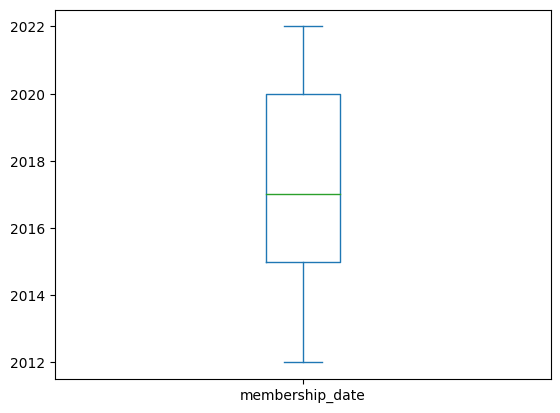

In [198]:
df.membership_date.dt.year.plot(kind='box')

### Clean `email` column


In [200]:
df.email.str.contains('@').value_counts()

email
True    1966
Name: count, dtype: int64

In [202]:
df.email = df.email.str.strip()

In [205]:
df.drop(['full_name','full_address','job_title'], axis=1,inplace=True)

In [206]:
df.head()

,age,martial_status,email,phone,membership_date,first_name,last_name,street,city,state,Job_lv,job
0,40.0,married,alush0@shutterfly.com,254-389-8708,2013-07-31,Addie,Lush,3226 Eastlawn Pass,Temple,Texas,None,Assistant Professor
1,46.0,married,rcradick1@newsvine.com,910-566-2007,2018-05-27,Rock,Cradick,4 Harbort Avenue,Fayetteville,North Carolina,III,Programmer
2,46.0,divorced,ssharvell2@amazon.co.jp,702-187-8715,2017-10-06,Sydel,Sharvell,4 School Place,Las Vegas,Nevada,I,Budget/Accounting Analyst
3,35.0,NaN,co3@bloglines.com,402-688-7162,2015-10-20,Constantin,De La Cruz,6 Monument Crossing,Omaha,Nebraska,None,Desktop Support Technician
4,38.0,married,gredhole4@japanpost.jp,917-394-6001,2019-05-29,Gaylor,Redhole,88 Cherokee Pass,New York City,New York,None,Legal Assistant
